In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
# Load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
# Reshape to include channel dimension (since MNIST is grayscale, the  channel is 1)
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [4]:
trainX, testX = trainX.astype('float32') / 255.0, testX.astype('float32') / 255.0
# One hot encode the labels
trainy = to_categorical(trainy)
testy = to_categorical(testy)

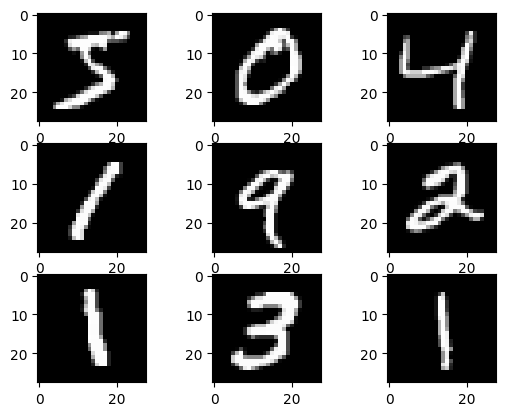

In [5]:
# Visualize some examples
for i in range(9):
 plt.subplot(330 + 1 + i)
 plt.imshow(trainX[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.show()

In [6]:
# Step 2: Defining the Model's Architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

In [7]:
# Build the model
model = Sequential()

In [8]:
# Add layers
model.add(Conv2D(32, (3, 3), activation='relu',
kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu',
kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Data augmentation to improve performance
datagen = ImageDataGenerator(width_shift_range=0.1,
height_shift_range=0.1, horizontal_flip=False)
datagen.fit(trainX)

In [11]:
history = model.fit(datagen.flow(trainX, trainy, batch_size=32),
 steps_per_epoch=int(len(trainX) / 32),
 epochs=10,
 validation_data=(testX, testy))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.8100 - loss: 0.5912 - val_accuracy: 0.9679 - val_loss: 0.0958
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9679 - val_loss: 0.0958
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.9586 - loss: 0.1373 - val_accuracy: 0.9801 - val_loss: 0.0580
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 995us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9801 - val_loss: 0.0580
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 35ms/step - accuracy: 0.9688 - loss: 0.1023 - val_accuracy: 0.9847 - val_loss: 0.0466
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9847 - val_loss: 0.0466
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9748 - loss: 0.0819 - val_accuracy: 0.9843 - val_loss: 0.0462
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9843 - val_loss: 0.0462
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - acc

In [12]:
# Step 4: Estimating the Model's Performance
# Evaluate the model
_, accuracy = model.evaluate(testX, testy, verbose=0)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 98.41%


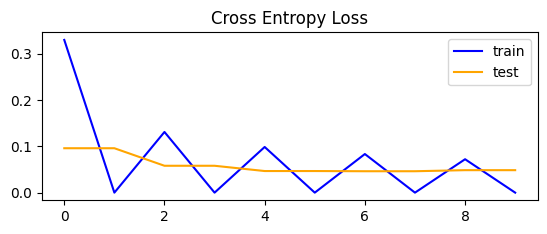

In [13]:
# Plot learning curves
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.legend()

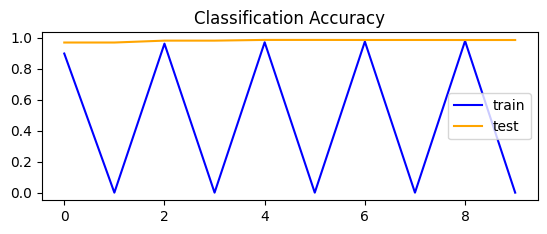

In [15]:
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.legend()
plt.show()